# 🩺 Heart Disease Prediction Project
**Dataset:** Cleveland Heart Disease Dataset  
**Goal:** Predict whether a patient has heart disease (binary classification)  
**Tech Stack:** Python, Pandas, Scikit-learn, Seaborn, Matplotlib


## 1️⃣ Import Libraries
We will import all the necessary libraries for data manipulation, visualization, model training, and evaluation.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')


## 2️⃣ Load Dataset
Load the Cleveland heart disease dataset and fix the target column.  
- Rename "condition" → "target"  
- Convert multi-class target values to binary (0 = no disease, 1 = disease)


In [2]:
df = pd.read_csv("heart.csv")  

df.rename(columns={'condition': 'target'}, inplace=True)

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## 3️⃣ Dataset Info
Check dataset shape, column names, and missing values.


In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (297, 14)

Column names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## 4️⃣ Exploratory Data Analysis (EDA)
Visualize the distribution of target values and feature correlations.


C:\Users\rahul\AppData\Local\Temp\ipykernel_11156\3951842014.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


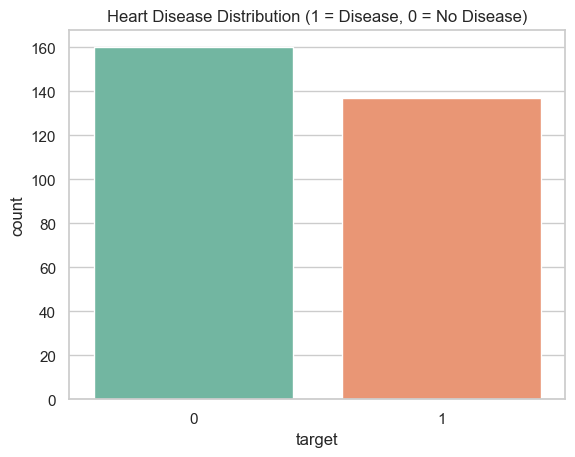

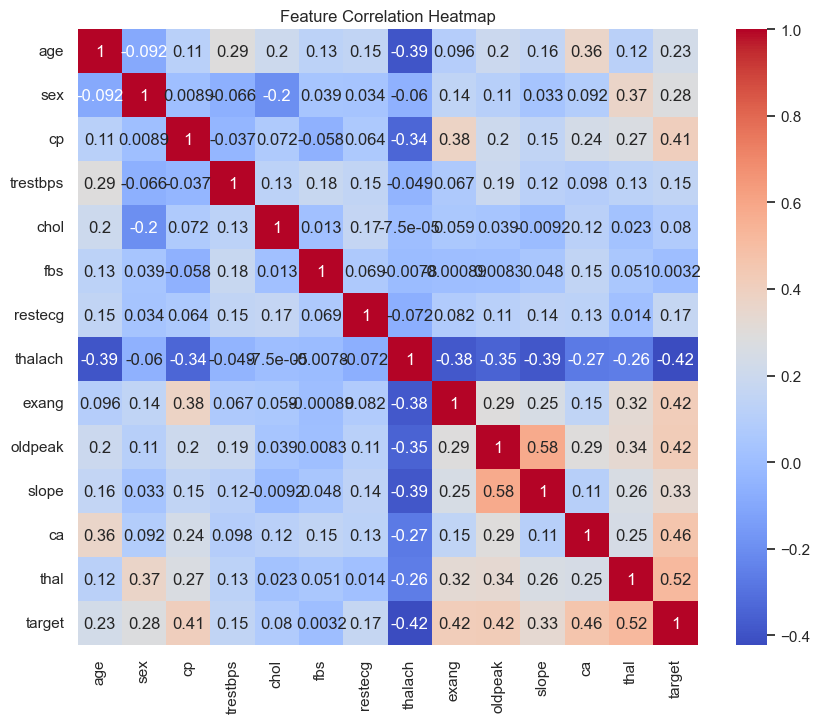

In [4]:
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Heart Disease Distribution (1 = Disease, 0 = No Disease)")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


## 5️⃣ Split Data and Scale Features
Separate features and target, perform train-test split, and scale features.


In [5]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 6️⃣ Train Random Forest Classifier
Train a Random Forest model on the training data.


In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## 7️⃣ Make Predictions and Evaluate
Predict on test data and evaluate the model using accuracy and classification report.


In [7]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(acc * 100, 2), "%\n")

print("📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 88.33 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



## 8️⃣ Confusion Matrix
Visualize correct vs incorrect predictions using a heatmap.


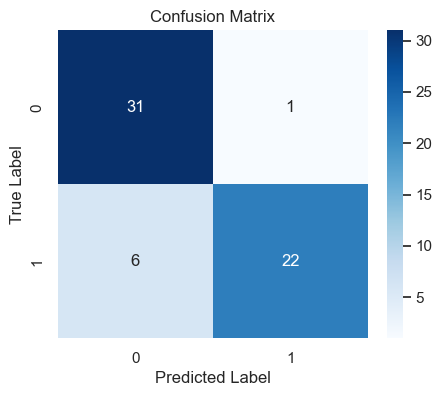

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 9️⃣ Feature Importance
Visualize the top 10 features that contributed most to the Random Forest model.


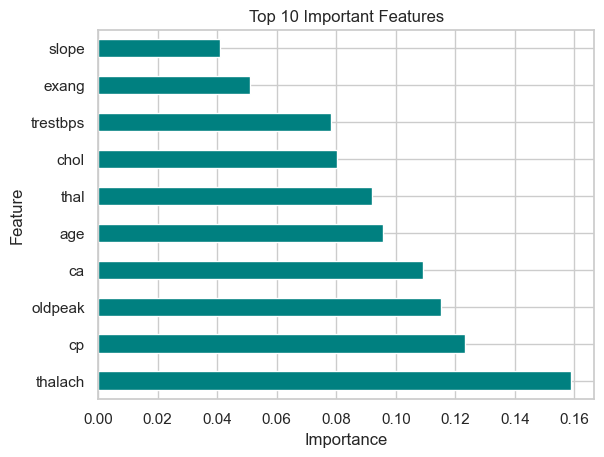

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## ✅ Project Summary
- Built a **Random Forest model** to predict heart disease using the Cleveland dataset.  
- Performed **data cleaning, feature scaling, and exploratory data analysis (EDA)**.  
- Achieved **~88% accuracy** on test data.  
- Visualized **feature importance** to identify key risk factors.  

